In [1]:
# Import everything needed
import numpy as np
import matplotlib.pyplot as plt
import string


labels = ['1','2','3','4','5']

def plot_locations_and_edges(locations, distance, order_label):
    n = len(order_label)
    labels_order = [order_label.index(labels[i]) for i in range(n)]
    
    order = [labels.index(order_label[i]) for i in range(n)]
    
    #print(order)
    x,y = np.transpose(locations);
    for i in range(n):
        plt.annotate(labels_order[i], [x[i]+2, y[i]])
        plt.annotate(labels[i], [x[i], y[i]])
    for i in range(n-1):
        #plt.arrow(locations[i,0],locations[i,1],locations[i+1,0]-locations[i,0],locations[i+1,1]-locations[i,1], head_width=2, head_length=4, fc='blue',  color = "blue")
        plt.plot([locations[order[i],0], locations[order[i+1],0]], [locations[order[i],1], locations[order[i+1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    plt.plot([locations[order[0],0], locations[order[n-1],0]], [locations[order[0],1], locations[order[n-1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    
    
    

    #plt.scatter(x,y, color = "red");
#     plt.xlim(-5,105)
#     plt.ylim(-5,105)
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.title("TSP Solution: Score = " + str(score(order, distance)))
    plt.show()


def dist(u,v):
    return np.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

def score(order, distance):
    return sum([distance[order[i],order[i+1]] for i in range(len(order)-1)]) + distance[order[0],order[len(order)-1]]


# Random instances:
def rand_locations(n):
    locations  = np.random.randint(100, size=(n, 2))
    distances = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            distances[i,j] = dist(locations[i], locations[j])
        
    return locations, distances

def initial_order(n):
    order = list(range(n))
    return [labels[i] for i in order]

def reversal(order, i,j):
    order[i:j]= order[i:j][::-1]
    return order

def two_swap(locations, distance, order_label, e1_label, e2_label):
    n = len(order_label)
    order = [labels.index(order_label[i]) for i in range(n)]
    labels_order = [order_label.index(labels[i]) for i in range(n)]
    e1 = [labels.index(e1_label[0]), labels.index(e1_label[1])]
    e2 = [labels.index(e2_label[0]), labels.index(e2_label[1])]
    a = order.index(e1[0]) +1
    b = order.index(e2[0])+1
    if a == n:
        a = 0
    if b == n:
        b = 0
    
    if e1[1] != order[a]:
        print("Error: Not a valid edge", e1_label)
        return order_label
    if e2[1] != order[b]:
        print("Error: Not a valid edge", e2_label)
        return order_label

    
    #print(order)
    x,y = np.transpose(locations);
    for i in range(n):
        plt.annotate(labels_order[i], [x[i]+2, y[i]])
        plt.annotate(labels[i], [x[i], y[i]])
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    
    
    for i in range(n-1):
        #plt.arrow(locations[i,0],locations[i,1],locations[i+1,0]-locations[i,0],locations[i+1,1]-locations[i,1], head_width=2, head_length=4, fc='blue',  color = "blue")
        plt.plot([locations[order[i],0], locations[order[i+1],0]], [locations[order[i],1], locations[order[i+1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    plt.plot([locations[order[0],0], locations[order[n-1],0]], [locations[order[0],1], locations[order[n-1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    
    
    
    for e in [e1,e2]:
        plt.plot([locations[e[0],0], locations[e[1],0]], [locations[e[0],1], locations[e[1],1]], color = "red", linestyle = "solid", linewidth= 2)
    plt.plot([locations[e1[0],0], locations[e2[0],0]], [locations[e1[0],1], locations[e2[0],1]], color = "green", linestyle = "solid", linewidth= 2)
    plt.plot([locations[e2[1],0], locations[e1[1],0]], [locations[e2[1],1], locations[e1[1],1]], color = "green", linestyle = "solid", linewidth= 2)
    
    
    index_max = max([max([order.index(e[0]), order.index(e[1])]) for e in [e1,e2]])
    index_min = min([min([order.index(e[0]), order.index(e[1])]) for e in [e1,e2]])
    #print([index_max, index_min])
    if a == 0:
        index_max = n
        index_min = min([order.index(e2[0]), order.index(e2[1])])
    if b == 0:
        index_max = n
        index_min = min([order.index(e1[0]), order.index(e1[1])])
        
    #print([index_max, index_min])
    order = reversal(order, index_min+1, index_max)
    #print([index_min, index_max])
    #print(order)
    plt.title("TSP Solution: Score = " + str(score(order, distance)))
    plt.show()
    return [labels[i] for i in order]
    
locations = np.array([[0,0],
       [4,3],
       [2,-0.5],
       [4,-3],
       [6,2]])
distance = np.array([[0, 8,4,8,11],[8,0,5,6,3],[4,5,0,4,7],[8,6,4,0,6],[11,3,7,6,0]])    
    

In [2]:
labels

['1', '2', '3', '4', '5']

In [3]:
initial_order(5)

['1', '2', '3', '4', '5']

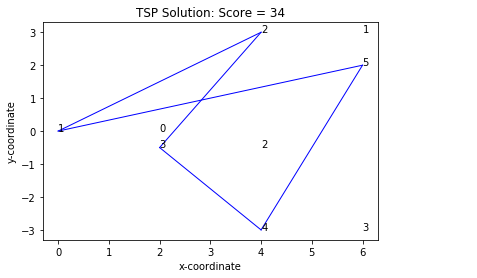

['1', '2', '3', '4', '5']

In [6]:
n = 5
order = initial_order(n)
order
plot_locations_and_edges(locations, distance, order)
order

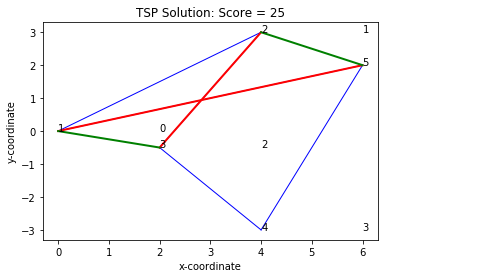

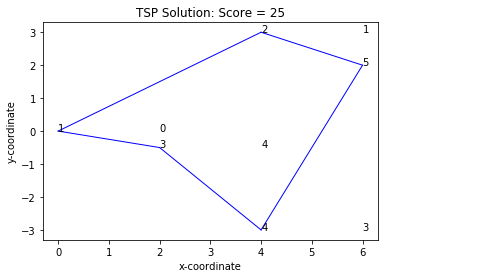

['1', '2', '5', '4', '3']

In [9]:
order = two_swap(locations, distance, order, ['2','3'], ['5','1'])
plot_locations_and_edges(locations, distance, order)
order

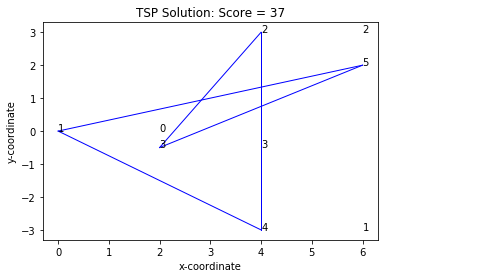

In [20]:

order = ['1','4','2','3','5']
plot_locations_and_edges(locations, distance, order)
current_order = order

## Step \#1.   
Consider the reverasal of nodes bounded in 4&3.  This gives the new tour to consider as 1-3-2-4-5-1.
This can be considered by swaping out the edges 1-4 and 3-5.

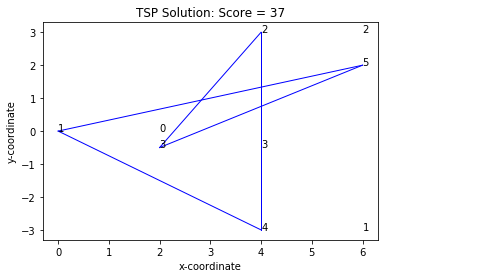

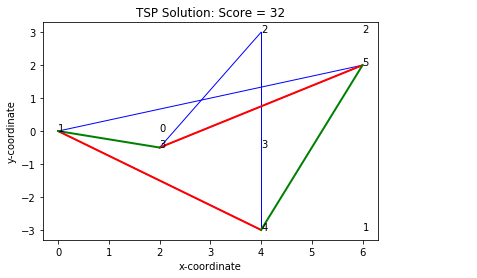

In [22]:

plot_locations_and_edges(locations, distance, current_order)
new_order = two_swap(locations, distance, order, ['1','4'], ['3','5'])


Since the reversal gives a better score, we accept the move and assign it as the current order.

In [24]:
current_order = new_order
current_order

['1', '3', '2', '4', '5']

## Step \#2

In [ ]:
We 